*PRESENTADO POR: GINA MARITZA MARTINEZ LOPEZ*

Proyecto clustering

In [137]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.decomposition import PCA 
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [138]:
df=pd.read_csv('CrimenCambridge.csv')

In [139]:
df.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"


In [140]:
df= df.sample(n=5000, random_state = 42)
df

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
11911,2010-05903,08/05/2010 10:04:00 PM,08/05/2010 20:30 - 22:00,Larceny from MV,108.0,East Cambridge,"BENT STREET & SECOND STREET, Cambridge, MA"
16481,2011-01954,03/19/2011 04:01:00 PM,03/19/2011 14:10 - 16:00,Larceny from MV,708.0,Riverside,"0 JFK STREET, Cambridge, MA"
33946,2013-06282,08/15/2013 07:37:00 PM,8/15/13 19:36,Arson,408.0,Area 4,"300 MASSACHUSETTS Avenue, Cambridge, MA"
828,2009-01118,02/13/2009 03:14:00 PM,02/13/2009 08:00 - 14:45,Auto Theft,103.0,East Cambridge,"300 THIRD STREET, Cambridge, MA"
31134,2013-02187,03/30/2013 05:46:00 PM,3/30/13 17:46,Simple Assault,706.0,Riverside,"0 Putnam Gdns, Cambridge, MA"
...,...,...,...,...,...,...,...
41272,2014-06377,08/28/2014 06:45:00 PM,08/28/2014 18:40 - 19:00,Larceny from Person,102.0,East Cambridge,"100 CAMBRIDGESIDE PL, Cambridge, MA"
52602,2016-02359,04/10/2016 04:23:00 PM,04/10/2016 01:00 - 09:00,Housebreak,1009.0,West Cambridge,"100 FAYERWEATHER ST, Cambridge, MA"
48750,2015-06685,09/04/2015 07:44:00 AM,09/03/2015 21:00 - 09/04/2015 07:43,Larceny from MV,604.0,Mid-Cambridge,"300 BROADWAY, Cambridge, MA"
41027,2014-06062,08/19/2014 09:15:00 AM,08/18/2014 18:00 - 08/19/2014 06:30,Larceny from MV,1010.0,West Cambridge,"200 BRATTLE ST, Cambridge, MA"


In [141]:
X=df

In [142]:
#Removemos las columnas irrelevantes
X=X.drop(['File Number','Date of Report', 'Crime Date Time', 'Location'],axis=1)

In [143]:
X=pd.get_dummies(X,prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
X

,Reporting Area,Crime_Admin Error,Crime_Aggravated Assault,Crime_Annoying & Accosting,Crime_Arson,Crime_Auto Theft,Crime_Commercial Break,Crime_Commercial Robbery,Crime_Counterfeiting,Crime_Disorderly,...,Neighborhood_East Cambridge,Neighborhood_Highlands,Neighborhood_Inman/Harrington,Neighborhood_MIT,Neighborhood_Mid-Cambridge,Neighborhood_North Cambridge,Neighborhood_Peabody,Neighborhood_Riverside,Neighborhood_Strawberry Hill,Neighborhood_West Cambridge
11911,108.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16481,708.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33946,408.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,103.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31134,706.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41272,102.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
52602,1009.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48750,604.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41027,1010.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [144]:
X_train, X_test= train_test_split(X,test_size=0.25, shuffle=True, random_state= 42)

In [145]:
# Estandariza de manera independiente el conjunto X_train y el conjunto X_test
scaler = preprocessing.StandardScaler().fit(X_train)
scaler_train=scaler.transform(X_train)
scaler_test = scaler.transform(X_test)

In [146]:
pca = PCA() 
X_train_pca = pca.fit_transform(scaler_train)

In [147]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

In [148]:
pca_train_scaled

array([[ 1.55958889,  0.11390494],
       [ 0.19038011, -0.54545916],
       [-0.34475477, -0.88066046],
       ...,
       [ 1.26564571,  0.54207239],
       [-1.52229156,  0.90057547],
       [-1.52229156,  0.90057547]])

In [149]:
train_pc1_coords = pca_train_scaled[:, 0] 
train_pc2_coords = pca_train_scaled[:, 1]

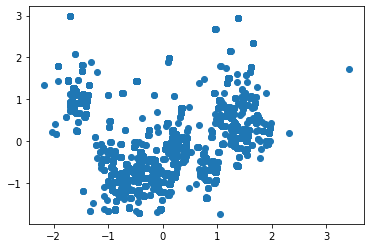

In [150]:
plt.scatter(train_pc1_coords, train_pc2_coords)

En el PCA se hace una reducción de dimensionalidad y no se realiza un agrupamiento, por esta razón no se pinta por colores diferentes sino un solo grupo.

Sin embargo, a simple vista diria que hay tres grupos, el pequeño de la izquierda, el grande de la derecha y el punto solo que esta al margen del lado izquierdo.

**Implementación de DBSCAN**

In [151]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(pca_train_scaled)
labels= clustering.labels_
max(labels)

3

In [152]:
clustering

DBSCAN(min_samples=2)

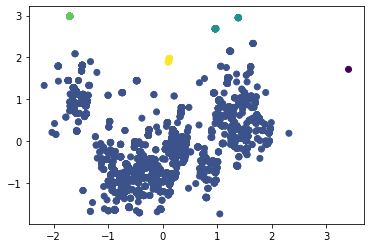

In [153]:
plt.scatter(train_pc1_coords, train_pc2_coords, c=labels )

Si epsilon es menor a 1, depende de que valor es epsilon, entre mas pequeño sea epsilon habra una mayor cantidad de agrupaciones, por ejemplos con epsilon=0.3 se tienen 18 agrupaciones, pero si epsilon es 0.5 hay 4 agrupaciones (dado se cuenta desde 0).
El clustering optimo sería separar el grupo pequeño del lado izquierdo del grande del derecho sin embargo en 0.3 lo separa pero son muchas agrupaciones, por lo tanto, pienso que elparametro de agrupación optimo esta en epsilon=0.5 y min_samples=2.


**Implementación KMeans**

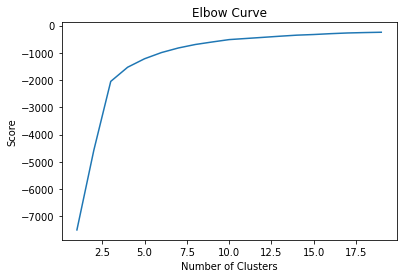

In [154]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(pca_train_scaled).score(pca_train_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

El valor de k seria *k=3*

In [155]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_train_scaled)
labels_kmeans= kmeans.labels_
labels_kmeans

array([0, 1, 1, ..., 0, 2, 2])

In [156]:
kmeans.cluster_centers_

array([[ 1.25130012,  0.6810327 ],
       [-0.18302968, -0.67317695],
       [-1.51091358,  1.34779341]])

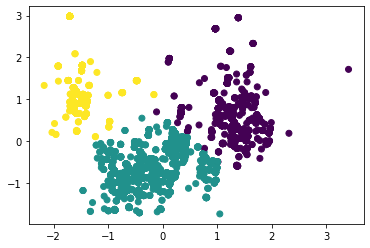

In [157]:
plt.scatter(train_pc1_coords, train_pc2_coords, c=labels_kmeans)

Se puede observar cmo en k-means luego de hallar el k optimo se observan las tres agrupaciones.

**Voy a implementar el algoritmo aglomerativo SpectralClustering:**

In [158]:
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0).fit(pca_train_scaled)
labels_c = clustering.labels_

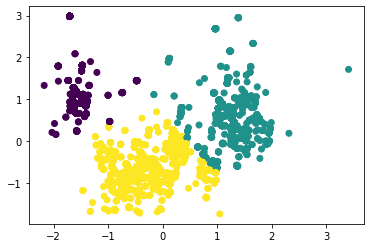

In [159]:
plt.scatter(train_pc1_coords, train_pc2_coords, c=labels_c)

**CONCLUSIONES**
-Se observa como el algoritmo SpectralClustering es muy parecido a Kmeans, luego observamos DBSCAN y este algoritmo nos da una grafica muy diferente de agrupación y no hace una buena agrupación tanto como los otros dos algoritmos. Para los tres casos se tuvo en cuenta el mismo valor de pca_train_scaled. Es dificil determinar entre Kmeans y SpectralClustering cual es el mejor algoritmo aglomerativo porque para este ejercicio las graficas son muy similares sin embargo, indigando sobre el tema, sabemos que el algoritmo SpectralClustering es mejor que Kmeans (adicionalmente, el ejercicio entre estos algoritmos se realizo bajo un mismo número de clusters).